In [1]:
import yaml
import xarray as xr
import matplotlib.pyplot as plt

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

## Open index dataset and msl data

<AxesSubplot: xlabel='time'>

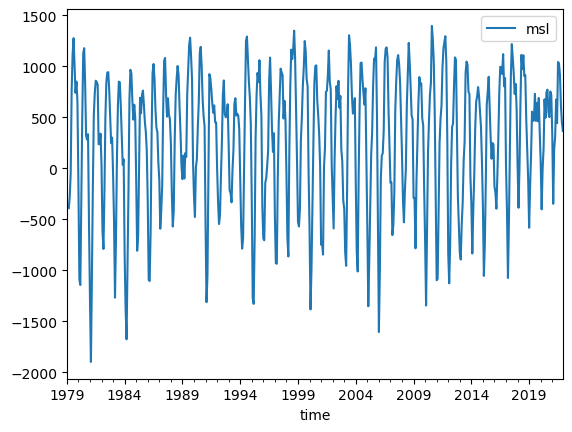

In [2]:
# Create name
infile = config[diagname]['output']
infile = infile + "/NAO_indx.nc"

# Open dataset
indx = xr.open_mfdataset(infile)

# Convert to dataframe
indx_df = indx.to_dataframe()

# Check data
indx_df.plot()

In [3]:
# Generate name for msl data and open them
infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl']

## Correlation map

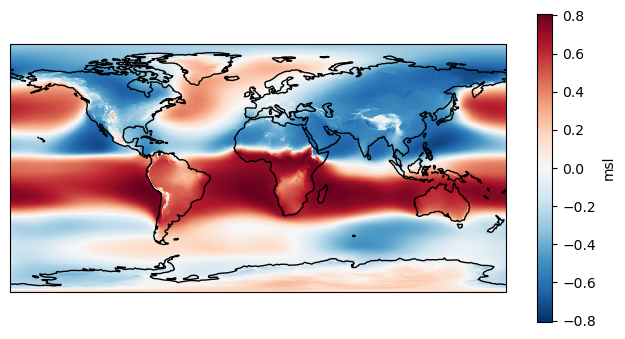

In [5]:
import cartopy.crs as ccrs

# Evaluate the map
cor0 = xr.corr(indx.msl, field, dim="time")

########
# Plot #
########

ccrs.PlateCarree()

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.coastlines()
cor0.plot(ax=ax)

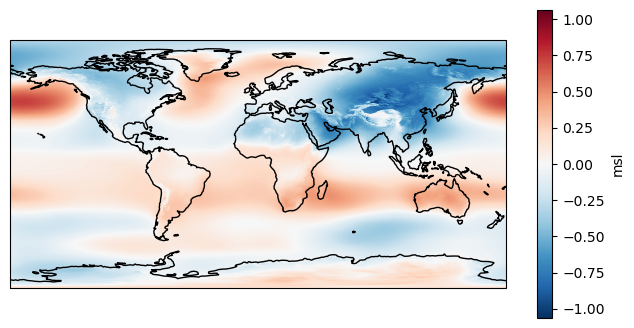

In [6]:
reg0 = xr.cov(indx.msl, field, dim="time")/indx.msl.var(dim='time',skipna=True).values

########
# Plot #
########

ccrs.PlateCarree()

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.coastlines()
reg0.plot(ax=ax)